In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 2048.", name="epoch 50")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
import torch
import torch.nn as nn

In [17]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2048)              4200448   
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 4,251,673
Trainable params: 4,251,673
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 3.3626 - mae: 1.3144INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 859ms/step - loss: 3.3626 - mae: 1.3144 - val_loss: 1.6797 - val_mae: 1.0170
Epoch 2/50
5/5 [==============================] - 1s 195ms/step - loss: 1.0671 - mae: 0.8264 - val_loss: 4.5027 - val_mae: 1.9664
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 4.0127 - mae: 1.6159INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 707ms/step - loss: 4.0127 - mae: 1.6159 - val_loss: 0.8174 - val_mae: 0.7352
Epoch 4/50
5/5 [==============================] - 1s 227ms/step - loss: 2.0072 - mae: 1.1053 - val_loss: 0.8256 - val_mae: 0.7259
Epoch 5/50
5/5 [==============================] - 1s 184ms/step - loss: 1.3001 - mae: 0.9762 - val_loss: 1.9295 - val_mae: 1.2842
Epoch 6/50
5/5 [==============================] - 1s 184ms/step - loss: 0.9523 - mae: 0.8044 - val_loss: 1.0157 - val_mae: 0.8979
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.8860 - mae: 0.8084INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 563ms/step - loss: 0.8860 - mae: 0.8084 - val_loss: 0.3725 - val_mae: 0.4964
Epoch 8/50
5/5 [==============================] - 1s 225ms/step - loss: 0.5155 - mae: 0.6028 - val_loss: 0.4735 - val_mae: 0.5548
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.3824 - mae: 0.4990INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 613ms/step - loss: 0.3824 - mae: 0.4990 - val_loss: 0.3576 - val_mae: 0.4858
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.3289 - mae: 0.4615INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 610ms/step - loss: 0.3289 - mae: 0.4615 - val_loss: 0.2735 - val_mae: 0.4281
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.2700 - mae: 0.4269INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 626ms/step - loss: 0.2700 - mae: 0.4269 - val_loss: 0.2499 - val_mae: 0.4122
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.2417 - mae: 0.4017INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 662ms/step - loss: 0.2417 - mae: 0.4017 - val_loss: 0.2263 - val_mae: 0.3873
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.2189 - mae: 0.3833INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 619ms/step - loss: 0.2189 - mae: 0.3833 - val_loss: 0.2077 - val_mae: 0.3751
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.2158 - mae: 0.3838INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 621ms/step - loss: 0.2158 - mae: 0.3838 - val_loss: 0.1886 - val_mae: 0.3637
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.1938 - mae: 0.3644INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 607ms/step - loss: 0.1938 - mae: 0.3644 - val_loss: 0.1883 - val_mae: 0.3590
Epoch 16/50
5/5 [==============================] - ETA: 0s - loss: 0.1904 - mae: 0.3608INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 638ms/step - loss: 0.1904 - mae: 0.3608 - val_loss: 0.1844 - val_mae: 0.3596
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.1845 - mae: 0.3573INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 650ms/step - loss: 0.1845 - mae: 0.3573 - val_loss: 0.1827 - val_mae: 0.3552
Epoch 18/50
5/5 [==============================] - 1s 228ms/step - loss: 0.1848 - mae: 0.3556 - val_loss: 0.1845 - val_mae: 0.3595
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.1881 - mae: 0.3591INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 591ms/step - loss: 0.1881 - mae: 0.3591 - val_loss: 0.1797 - val_mae: 0.3541
Epoch 20/50
5/5 [==============================] - 1s 217ms/step - loss: 0.1861 - mae: 0.3571 - val_loss: 0.1825 - val_mae: 0.3561
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.1832 - mae: 0.3554INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_232458-2o28d6uf\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.1832 - mae: 0.3554 - val_loss: 0.1784 - val_mae: 0.3541
Epoch 22/50
5/5 [==============================] - 1s 205ms/step - loss: 0.1852 - mae: 0.3575 - val_loss: 0.1791 - val_mae: 0.3545
Epoch 23/50
5/5 [==============================] - 1s 185ms/step - loss: 0.1953 - mae: 0.3662 - val_loss: 0.1819 - val_mae: 0.3545
Epoch 24/50
5/5 [==============================] - 1s 186ms/step - loss: 0.1909 - mae: 0.3603 - val_loss: 0.1827 - val_mae: 0.3550
Epoch 25/50
5/5 [==============================] - 1s 185ms/step - loss: 0.1963 - mae: 0.3639 - val_loss: 0.1857 - val_mae: 0.3590
Epoch 26/50
5/5 [==============================] - 1s 184ms/step - loss: 0.1935 - mae: 0.3638 - val_loss: 0.1870 - val_mae: 0.3573
Epoch 27/50
5/5 [==============================] - 1s 184ms/step - loss: 0.1981 - mae: 0.3667 - val_loss: 0.1830 - val_mae: 0.3584
Epoch 28/50
5/5 [==============================] - 1s 183ms/step - loss: 0.1844 - mae: 0.3567 -

In [18]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 93ms/step


In [19]:
test_input.shape

(1, 100, 2)

In [20]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [21]:
test_label.shape

(1, 25, 1)

In [22]:
y_hat

array([[0.92417973, 0.9592589 , 0.99223197, 1.1458434 , 1.0929892 ,
        1.1576185 , 0.90679073, 1.133164  , 0.9812966 , 1.0397028 ,
        1.172875  , 1.0963377 , 1.0127796 , 1.1494775 , 1.0801206 ,
        1.1873107 , 1.2090213 , 1.105811  , 1.1909436 , 1.0525184 ,
        1.0855495 , 1.1822559 , 1.2546408 , 1.1797376 , 0.99333584]],
      dtype=float32)

In [23]:
y_hat.shape

(1, 25)

In [24]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [25]:
y_hat = (y_hat*data_std)+data_mean

In [26]:
#print(scaler.data_max_)

In [27]:
#print(scaler.data_min_)

In [28]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

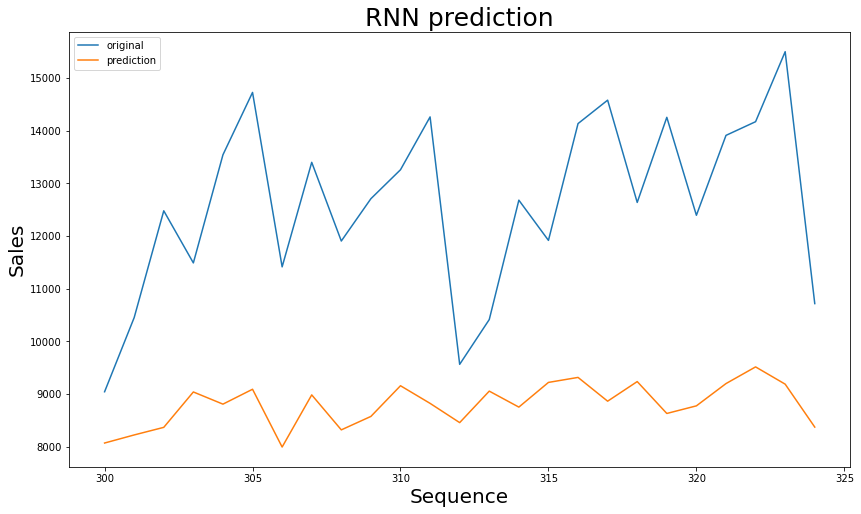

In [29]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [30]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 27ms/step - loss: 0.8735 - mae: 0.8736


[0.8734586834907532, 0.8736119866371155]